## Cardiovascular Disease Project Introduction

This is one if my first data science projects. <br>
<br>
In this notebook, I take a look at a dataset containing 70,000 entries of patients' medical information such as height, weight, age, blood pressure, glucose levels, and cholesterol levels. <br>
<br>
The goal of this project is to use these features in order to make predictions of a patient having cardiovascular disease. <br>
Several classification models will be investigated in this project. <br>
<br>
Any constructive feedback is welcomed and upvotes would be greately appreciated!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
# Check for missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df['cardio'].unique()

array([0, 1], dtype=int64)

In [6]:
# Convert age from days to years
df['age'] =  df['age'] / 365

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Rename columns to make features more clearly understood
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'gluc': 'glucose', 'alco': 'alcohol', 'cardio': 'cardiovascular disease'}, inplace=True)

In [9]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


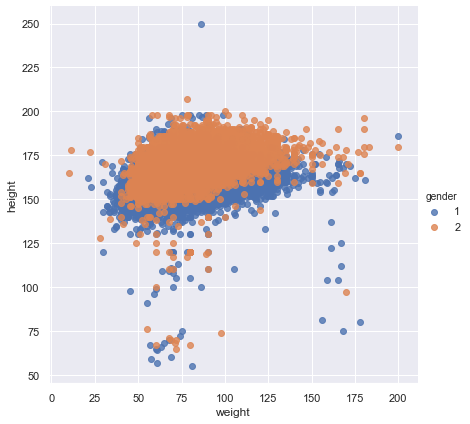

In [135]:
sns.lmplot(x='weight', y='height', hue='gender', data=df, fit_reg=False, height=6)
plt.show()

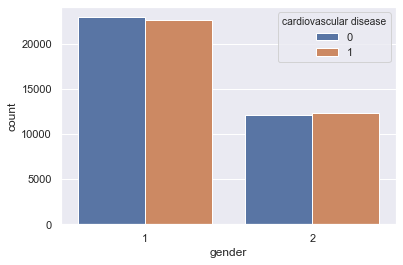

In [11]:
sns.countplot(x='gender', data=df, hue='cardiovascular disease')
plt.show()

# Not much of a difference between females (1) and males (2) and the chance of getting cardiovascular disease.

In [12]:
df.describe()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Note:** Very strange observations in the height and weight. Minimum and maximum values do not look realistic.

In [13]:
df_train = df.drop('id', axis=1)

In [14]:
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age                       70000 non-null float64
gender                    70000 non-null int64
height                    70000 non-null int64
weight                    70000 non-null float64
systolic                  70000 non-null int64
diastolic                 70000 non-null int64
cholesterol               70000 non-null int64
glucose                   70000 non-null int64
smoke                     70000 non-null int64
alcohol                   70000 non-null int64
active                    70000 non-null int64
cardiovascular disease    70000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [16]:
# 24 Duplicated entries
df_train.duplicated().sum()

24

In [17]:
df_train[df_train.duplicated()]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
10562,56.150685,1,165,70.0,120,80,1,1,0,0,1,0
21784,46.008219,1,165,68.0,120,80,1,1,0,0,1,0
38505,52.021918,1,164,65.0,120,80,1,1,0,0,1,0
40365,39.868493,1,158,64.0,120,80,1,1,0,0,1,0
42450,50.282192,1,169,67.0,120,80,1,1,0,0,1,0
44653,46.402740,2,170,70.0,120,80,1,1,0,0,0,0
45125,58.301370,1,165,65.0,120,80,1,1,0,0,1,0
45748,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45810,58.164384,1,164,62.0,120,80,1,1,0,0,1,0
48917,60.123288,1,165,60.0,120,80,1,1,0,0,1,0


In [18]:
df_train.drop_duplicates(inplace=True)

In [19]:
df_train.count()

age                       69976
gender                    69976
height                    69976
weight                    69976
systolic                  69976
diastolic                 69976
cholesterol               69976
glucose                   69976
smoke                     69976
alcohol                   69976
active                    69976
cardiovascular disease    69976
dtype: int64

In [20]:
df_train.isnull().sum()

age                       0
gender                    0
height                    0
weight                    0
systolic                  0
diastolic                 0
cholesterol               0
glucose                   0
smoke                     0
alcohol                   0
active                    0
cardiovascular disease    0
dtype: int64

## Exploratory Data Analysis

In [21]:
df_train.head()

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


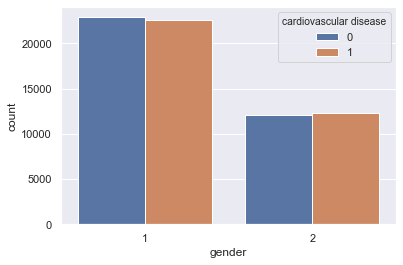

In [151]:
sns.countplot(x='gender', hue='cardiovascular disease', data=df_train)
plt.show()

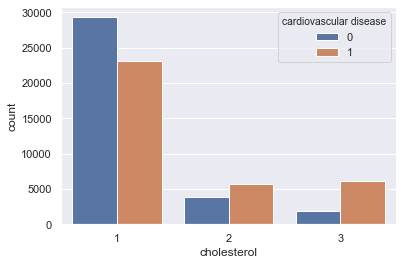

In [150]:
sns.countplot(x='cholesterol', hue='cardiovascular disease', data=df_train)
plt.show()
# There appears to be a correlation between higher cholesterol levels and cardiovascular disease
# chloesterol levels: 1 = normal, 2 = above normal, 3 = well above normal

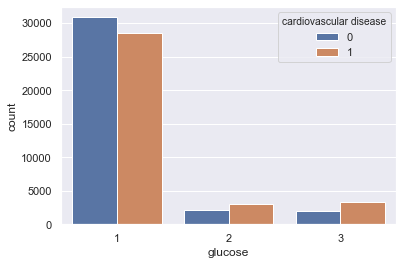

In [149]:
sns.countplot(x='glucose', hue='cardiovascular disease', data=df_train)
plt.show()
# There appears to be another correlation between higher glucose levels and cardiovascular disease
# glucose levels: 1 = normal, 2 = above normal, 3 = well above normal

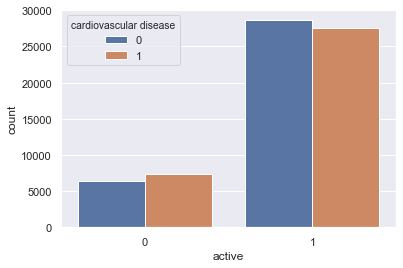

In [148]:
sns.countplot(x='active', hue='cardiovascular disease', data=df_train)
plt.show()

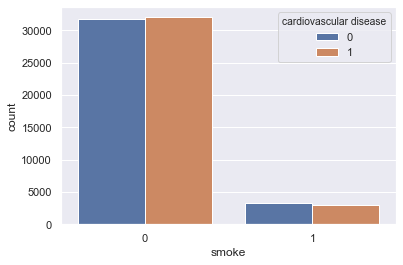

In [147]:
sns.countplot(x='smoke', hue='cardiovascular disease', data=df_train)
plt.show()

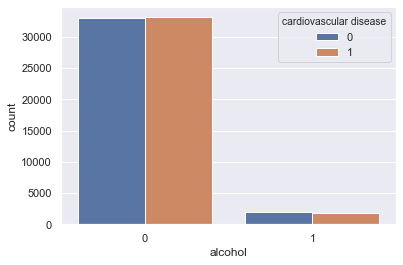

In [146]:
sns.countplot(x='alcohol', hue='cardiovascular disease', data=df_train)
plt.show()

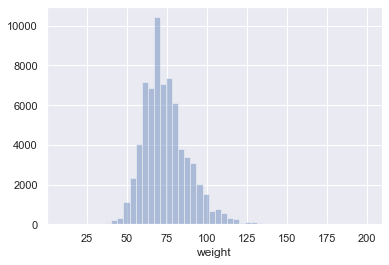

In [145]:
sns.distplot(df_train['weight'], kde=False)
plt.show()

In [144]:
df_train['weight'].sort_values().head()

57858    10.0
33817    11.0
60188    21.0
29488    22.0
26806    23.0
Name: weight, dtype: float64

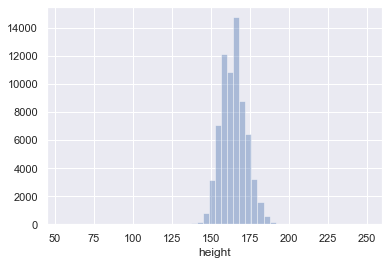

In [143]:
sns.distplot(df_train['height'], kde=False)
plt.show()

In [30]:
df_train['height'].max()

250

This maximum height of 250 cm/8.2 ft seems unlikely 

In [139]:
df_train['height'].sort_values().head()

22723    55
66643    57
64115    59
29157    60
27603    64
Name: height, dtype: int64

The minimum height of 55 cm/1.8 ft also seems unlikely and unrealistic. <br>
This dataset may not be legitimate; however, we will continue on with the data analysis and model selection.

## Feature Engineering

**Body Mass Index (BMI)** is a common metric used for medical evaluation and heart health <br>
BMI can be calculated by the following: BMI = weight(kg) / height (cm) / height (cm) x 10,000 <br>
<br>
**Pulse Pressure** is another indicator of heart health <br>
Pulse Pressure can be calculated by the following: Pulse Pressure = systolic - diastolic <br>
Typically, a pulse pressure greater than 60 can be a useful predictor of heart attacks or other cardiovascular diseases

In [33]:
df_train['BMI'] = df_train['weight'] / df_train['height'] / df_train['height'] * 10000
df_train['pulse pressure'] = df_train['systolic'] - df_train['diastolic']

In [152]:
df_train.head()
# Quick look at the dataframe to make sure these new features have been added

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40


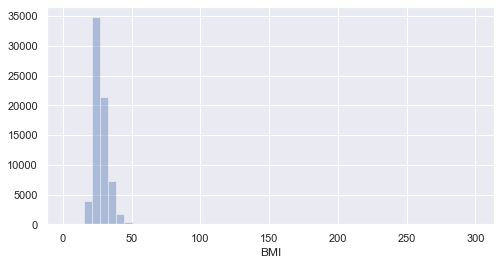

In [36]:
plt.figure(figsize=(8,4))
sns.distplot(df_train['BMI'], bins=50, kde=False)
plt.show()

In [68]:
df_train[df_train['BMI'] > 100].head(10)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
6153,57.506849,1,122,161.0,120,80,1,1,0,0,1,1,108.169847,40
7598,40.167123,2,70,72.0,120,8,1,1,0,0,1,0,146.938776,112
8171,48.345205,2,97,170.0,160,100,1,1,1,0,1,1,180.678074,60
12770,53.682192,1,75,168.0,120,80,1,1,1,0,1,1,298.666667,40
13265,61.523288,2,71,68.0,120,80,3,1,0,0,1,0,134.893870,40
14323,60.287671,1,67,57.0,120,90,1,1,0,0,1,1,126.977055,30
15167,43.320548,1,70,68.0,120,80,1,1,0,0,0,0,138.775510,40
15366,47.684932,1,125,167.0,180,90,1,2,0,0,1,1,106.880000,90
16699,53.917808,2,74,98.0,140,90,1,1,0,0,1,1,178.962747,50
20028,54.183562,1,112,167.0,180,120,1,1,0,1,1,0,133.131378,60


Quick observation to see if extremely high BMI values correlate to cardiovascular disease

In [154]:
df_train[(df_train['pulse pressure'] >= 60 ) & (df_train['cholesterol'] == 3)].head(15)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,cardiovascular disease,BMI,pulse pressure
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60
24,45.501370,1,170,68.0,150,90,3,1,0,0,1,1,23.529412,60
44,54.147945,1,154,50.0,170,80,3,1,0,0,1,1,21.082813,90
61,57.424658,2,165,75.0,180,90,3,1,0,0,1,1,27.548209,90
194,60.243836,1,162,62.0,140,80,3,1,0,0,1,1,23.624447,60
221,48.194521,1,157,70.0,160,100,3,1,0,0,0,1,28.398718,60
230,64.043836,2,175,75.0,180,100,3,1,1,1,1,1,24.489796,80
275,53.819178,1,157,80.0,150,90,3,1,0,0,1,1,32.455678,60
280,55.843836,1,152,72.0,160,90,3,1,0,0,1,1,31.163435,70
299,63.991781,2,173,85.0,140,80,3,1,0,0,1,1,28.400548,60


Cursory glance at individuals who have both high pulse pressure (>=60) *and* well above normal cholesterol levels (3). <br>
Upon inspection of the first several entries, having both high pulse pressure and well above normal cholesterol levels correlate to a higher likelihood of having cardiovascular disease.

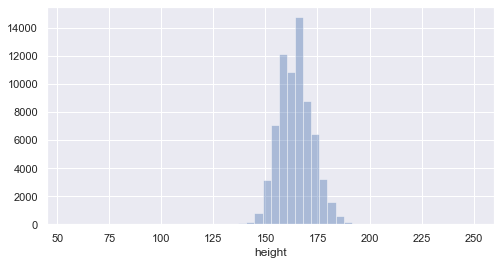

In [39]:
plt.figure(figsize=(8,4))
sns.distplot(df_train['height'], kde=False)
plt.show()

In [40]:
# Splitting data into training and testing datasets
X = df_train.drop(['weight', 'height', 'cardiovascular disease'], axis=1)
y = df_train['cardiovascular disease']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [41]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
len(X_train)

48983

In [43]:
len(y_train)

48983

## Model Selection

We will investigate different classification models and evaluate each to select the best performer.
The models that will be evaluted are the following:
- Random Forest
- SVM
- KNN
- Naive Bayes
- XGBoost

**Random Forest Model Investigation**

In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred_rfc = rfc.predict(X_test)

In [46]:
# Random Forest Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[7678 2824]
 [3309 7182]]
              precision    recall  f1-score   support

           0       0.70      0.73      0.71     10502
           1       0.72      0.68      0.70     10491

    accuracy                           0.71     20993
   macro avg       0.71      0.71      0.71     20993
weighted avg       0.71      0.71      0.71     20993



In [47]:
rfc.score(X_test, y_test)

0.7078549992854761

**K-Fold cross-valuidation of Random Forest Model**

In [74]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_rfc = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)

In [70]:
accuracies_rfc

array([0.69714286, 0.70932843, 0.70191915, 0.70049   , 0.71335239,
       0.70620661, 0.70232748, 0.7115149 , 0.70273581, 0.70783993])

In [71]:
accuracies_rfc.mean()

0.7052857571631552

In [75]:
accuracies_rfc.std()

0.005574043305940773

**SVM Model Investigation**

In [48]:
# SVM
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_pred_svc = svc.predict(X_test)

In [50]:
# SVM Model Evaluation
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[8096 2406]
 [3375 7116]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10502
           1       0.75      0.68      0.71     10491

    accuracy                           0.72     20993
   macro avg       0.73      0.72      0.72     20993
weighted avg       0.73      0.72      0.72     20993



In [51]:
svc.score(X_test, y_test)

0.7246224932120231

**K-Fold cross-valuidation of SVM model**

In [77]:
#Applying k-Fold Cross Validation
accuracies_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10, n_jobs=4)

In [78]:
accuracies_svc

array([0.71571429, 0.72872015, 0.72703144, 0.7155982 , 0.73846468,
       0.73417722, 0.73029808, 0.72315231, 0.72498979, 0.73233973])

In [79]:
accuracies_svc.mean()

0.7270485882254308

In [80]:
accuracies_svc.std()

0.007081607374783597

**K-Nearest Neighbor Model Investigation**

In [81]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [82]:
y_pred_knn = knn.predict(X_test)

In [83]:
# KNN Model Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[7689 2813]
 [3860 6631]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70     10502
           1       0.70      0.63      0.67     10491

    accuracy                           0.68     20993
   macro avg       0.68      0.68      0.68     20993
weighted avg       0.68      0.68      0.68     20993



In [84]:
knn.score(X_test, y_test)

0.6821321392845234

**K-Fold cross-valuidation of KNN model**

In [85]:
#Applying k-Fold Cross Validation
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [86]:
accuracies_knn

array([0.6655102 , 0.66932027, 0.67558187, 0.67741935, 0.69150674,
       0.6725194 , 0.67660269, 0.67006942, 0.67211107, 0.67660269])

In [87]:
accuracies_knn.mean()

0.6747243703414126

In [88]:
accuracies_knn.std()

0.0066645880556574204

**Naive Bayes Model Investigation**

In [56]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
y_pred_nbc = nbc.predict(X_test)

In [58]:
# Naive Bayes Model Evaluation
print(confusion_matrix(y_test, y_pred_nbc))
print(classification_report(y_test, y_pred_nbc))

[[9461 1041]
 [7684 2807]]
              precision    recall  f1-score   support

           0       0.55      0.90      0.68     10502
           1       0.73      0.27      0.39     10491

    accuracy                           0.58     20993
   macro avg       0.64      0.58      0.54     20993
weighted avg       0.64      0.58      0.54     20993



In [59]:
nbc.score(X_test, y_test)

0.5843852712809031

**K-Fold cross-valuidation of Naive Bayes model**

In [90]:
#Applying k-Fold Cross Validation
accuracies_nbc = cross_val_score(estimator=nbc, X=X_train, y=y_train, cv=10)

In [91]:
accuracies_nbc

array([0.57489796, 0.58848745, 0.58084933, 0.57594937, 0.600245  ,
       0.58942425, 0.58983258, 0.58146182, 0.58493263, 0.5763577 ])

In [92]:
accuracies_nbc.mean()

0.5842438080162355

In [93]:
accuracies_nbc.std()

0.007551078166408553

**XGBoost Model Investigation**

In [115]:
# XGBoost Model
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [116]:
y_pred_xgb = xgb.predict(X_test)

In [117]:
# XGBoost Model Evaluation
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[8203 2299]
 [3264 7227]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10502
           1       0.76      0.69      0.72     10491

    accuracy                           0.74     20993
   macro avg       0.74      0.73      0.73     20993
weighted avg       0.74      0.74      0.73     20993



In [118]:
xgb.score(X_test, y_test)

0.7350069070642595

**K-Fold cross-valuidation of XGBoost model**

In [119]:
#Applying k-Fold Cross Validation
accuracies_xgb = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

In [120]:
accuracies_xgb

array([0.72897959, 0.73831394, 0.73519804, 0.72968559, 0.74867293,
       0.74030216, 0.7394855 , 0.73846468, 0.73662719, 0.7360147 ])

In [121]:
accuracies_xgb.mean()

0.7371744329700837

In [122]:
accuracies_xgb.std()

0.0052829081102285964

**Grid Search for the top two models** <br>
Based on this investigation so far, the two best performers are the *XGBoost* and *SVM* models with mean accuracy scores of *73.7%* and *72.7%*, respectively. <br>
**Note:** Grid search has been commented out due to length of processing time.

In [99]:
#Applying Grid Search to find the best model and best parameters (XGBoost)
#from sklearn.model_selection import GridSearchCV

#define set of parameters that will be investigated by Grid Search
#parameters = {
#            'learning_rate': [0.01, 0.02, 0.05, 0.1],
#            'n_estimators': [100, 200, 300, 500],
#            'min_child_weight': [1, 5, 10],
#            'gamma': [0.5, 1, 1.5, 2, 5],
#            'subsample': [0.6, 0.8, 1.0],
#            'colsample_bytree': [0.6, 0.8, 1.0],
#            'max_depth': [3, 4, 5]
#            }

In [100]:
#grid_search = GridSearchCV(estimator=xgb,
#                          param_grid = parameters,
#                          scoring = 'accuracy',
#                          cv = 10,
#                          n_jobs = -1)

In [102]:
#grid_search = grid_search.fit(X_train, y_train)

In [103]:
#Applying Grid Search to find the best model and best parameters (SVM)
#from sklearn.model_selection import GridSearchCV

#define set of parameters that will be investigated by Grid Search
#parameters = {'C': [1, 10, 100, 1000], 'kernel': ['rbf']}

In [104]:
#grid_search = GridSearchCV(estimator=svc,
#                          param_grid = parameters,
#                          scoring = 'accuracy',
#                          cv = 10,
#                          n_jobs = -1)

In [106]:
#grid_search = grid_search.fit(X_train, y_train)

## Conclusion

- The XGBoost model was the best performer out of the five models giving us a mean accuracy score of 73.7%. <br>
- K-Fold cross validation was used to ensure no overfitting was done. <br>
- Grid search can be further performed on the best model candidates; however, this step can be time intensive, potentially demanding a great deal of CPU usage.

In [134]:
model = ['Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'XGBoost']
scores = [accuracies_rfc.mean(),accuracies_svc.mean(),accuracies_knn.mean(),accuracies_nbc.mean(),accuracies_xgb.mean()]

summary = pd.DataFrame(data=scores, index=model, columns=['Mean Accuracy'])
summary.sort_values(by='Mean Accuracy', ascending=False)

,Mean Accuracy
XGBoost,0.737174
SVM,0.727049
Random Forest,0.705327
KNN,0.674724
Naive Bayes,0.584244
